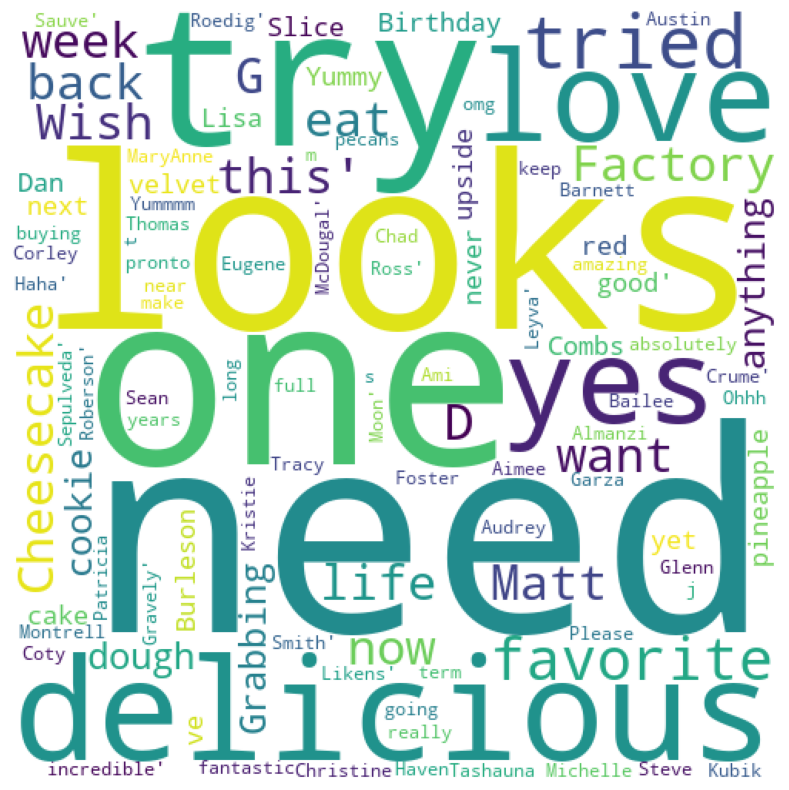

In [28]:
#example 7
import matplotlib.pyplot as plt
import pandas
from wordcloud import WordCloud
import re

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = pandas.read_csv("example5results.csv")

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#Remove special characters
yelp_review_list = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

#I am converting list to string so I can analyze the data
yelp_review_string = ''
for eachletter in  str(yelp_review_list):
    yelp_review_string += eachletter

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


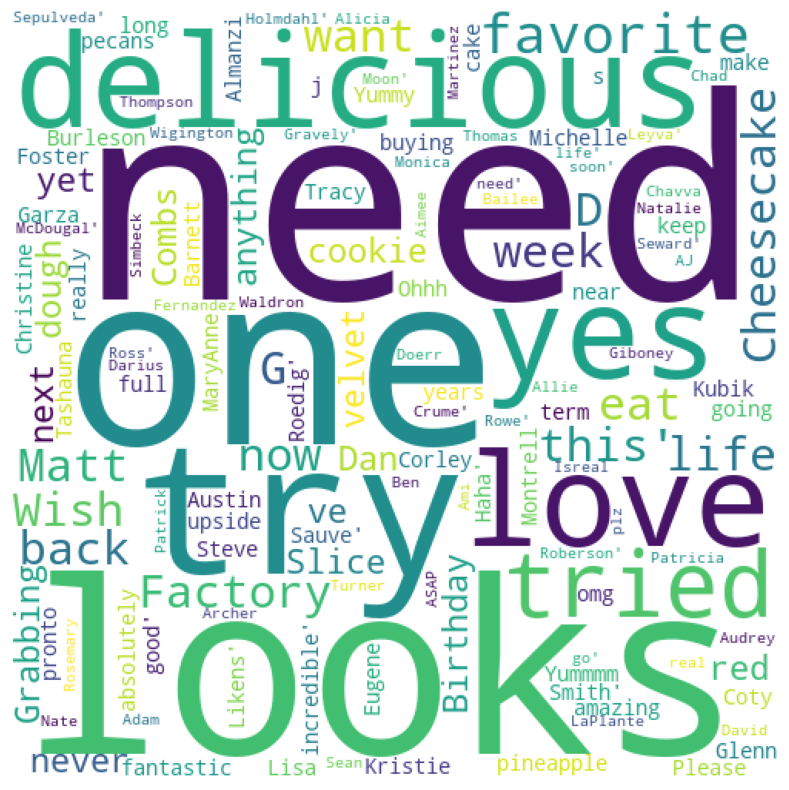

In [29]:
#example 8

import matplotlib.pyplot as plt
import pandas
from wordcloud import WordCloud

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = pandas.read_csv("example5results.csv")

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#I am converting list to string so I can analyze the data
yelp_review_string = ''
for eachletter in  str(yelp_review_list):
    yelp_review_string += eachletter


#I am cleaning the text in reviews a bit before drawing the wordcloud
cleaned_text = yelp_review_string.replace("\\n","")
cleaned_text = yelp_review_string.replace("<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});","")
cleaned_text = yelp_review_string.replace("https","")
cleaned_text = yelp_review_string.replace("\\s","")
cleaned_text = yelp_review_string.replace('\\',"")

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(cleaned_text )

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [30]:
#example 9
import pandas
from statistics import mean
import statistics

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = pandas.read_csv("example5results.csv")

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#Calculate average review length in words
average_review_length = mean([len(i) for i in yelp_review_list])
print("Average Review Length:",average_review_length )
#Minimum review length
minimum_review_length = min(len(ele) for ele in yelp_review_list)
print("Minimum Review Length:", minimum_review_length)
#Maximum review length
maximum_review_length = max(len(ele) for ele in yelp_review_list)
print("Maximum Review Length:", maximum_review_length)
#Standard Deviation of review length
standarddeviation_review_length = statistics.stdev(len(ele) for ele in yelp_review_list)
print("Standard Deviation of Review Length:", standarddeviation_review_length)


Average Review Length: 30.3
Minimum Review Length: 7
Maximum Review Length: 109
Standard Deviation of Review Length: 26.015105502106163


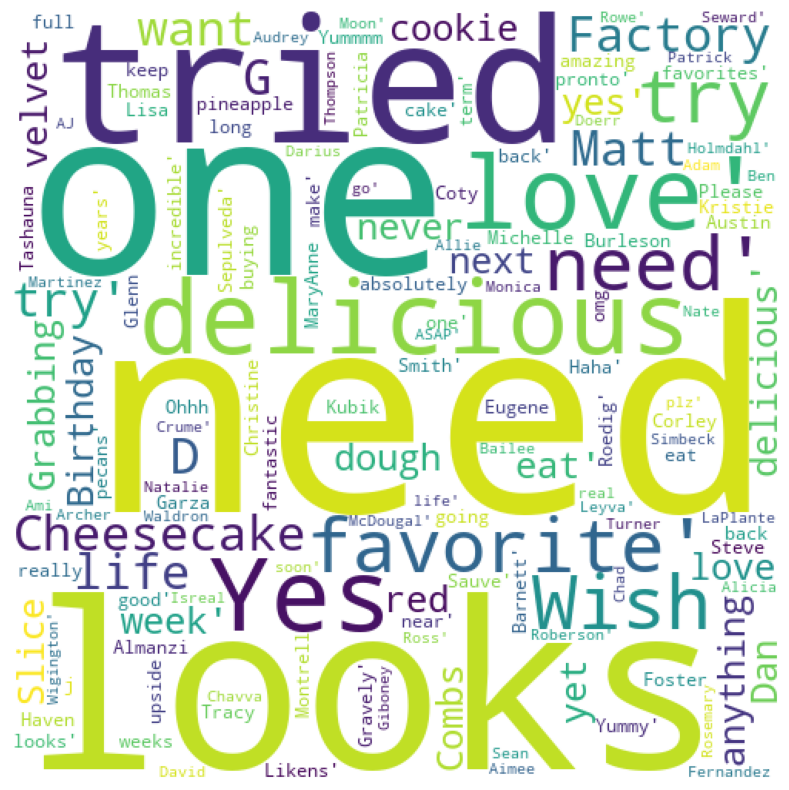

In [31]:
#example 10



import pandas
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = pandas.read_csv("example5results.csv")

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


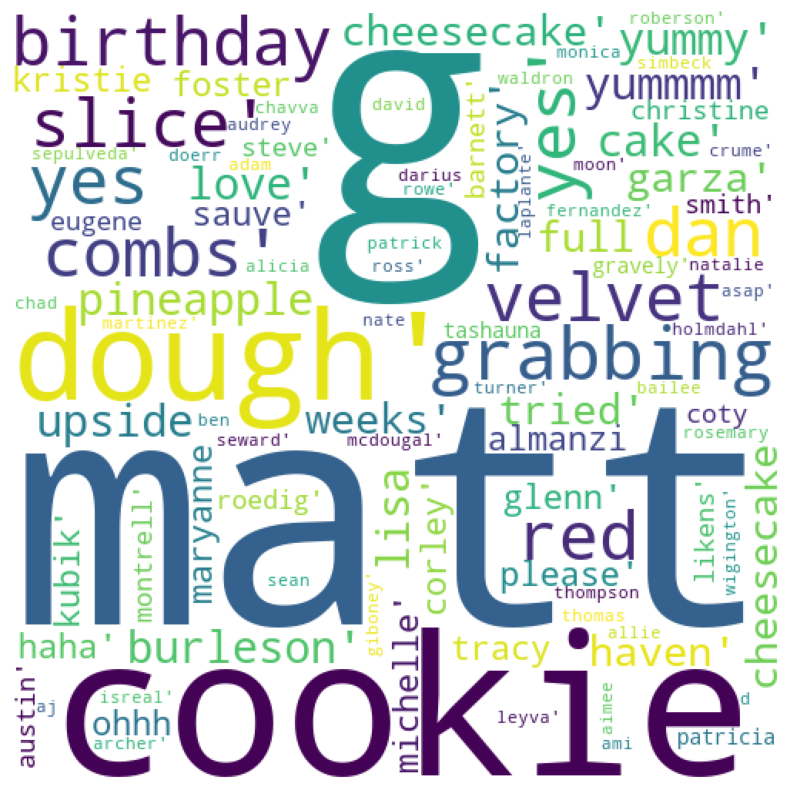

In [32]:
#example 11
import pandas
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

#Create an empty dataframe
yelp_data_in_dataframe = pandas.DataFrame()
#Put the contents of the csv file into the dataframe
yelp_data_in_dataframe = pandas.read_csv("example5results.csv")

# I created a new dictionary here
yelp_review_dictionary = {}
#I am assinging the post text column data into the dictionary
yelp_review_dictionary = yelp_data_in_dataframe.get('Review')

# I am converting dictionary to a list so I can analyze the data
yelp_review_list = list(yelp_review_dictionary.values)

#convert text to lower case
yelp_review_list_lowercase = [i.lower() for i in yelp_review_list]

#remove special characters
yelp_review_list_lowercase = [re.sub(r"[^a-zA-Z]", " ", text) for text in yelp_review_list]

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

reviews = []

for text in yelp_review_list_lowercase:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]

#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

yelp_review_string = ''
for eachletter in  str(cleantext):
    yelp_review_string += eachletter

input = TextBlob(yelp_review_string)

noun_phrases = input.noun_phrases

yelp_review_string = ''
for eachletter in  str(noun_phrases):
    yelp_review_string += eachletter

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(yelp_review_string)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
